In [1]:
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 42.21 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
import os


In [ ]:
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')
test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names)
test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names)
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names)
test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names)

['COVID19(522).jpg', 'COVID19(340).jpg', 'COVID19(507).jpg', 'COVID19(43).jpg', 'COVID-19 (173).jpg', 'COVID-19 (178).jpg', 'COVID19(400).jpg', 'COVID19(539).jpg', 'COVID19(380).jpg', 'COVID19(229).jpg', 'COVID19(359).jpg', 'COVID19(188).jpg', 'COVID19(388).jpg', 'COVID19(57).jpg', 'COVID19(458).jpg', 'COVID19(262).jpg', 'COVID19(475).jpg', 'COVID19(530).jpg', 'COVID-19 (180).jpg', 'COVID19(247).jpg', 'COVID19(307).jpg', 'COVID19(109).jpg', 'COVID19(390).jpg', 'COVID-19 (1).jpeg', 'COVID19(422).jpg', 'COVID19(551).jpg', 'COVID19(65).jpg', 'COVID19(434).jpg', 'COVID19(403).jpg', 'COVID19(533).jpg', 'COVID19(298).jpg', 'COVID19(62).jpg', 'COVID19(290).jpg', 'COVID19(378).jpg', 'COVID19(103).jpg', 'COVID19(392).jpg', 'COVID-19 (11).jpg', 'COVID19(225).jpg', 'COVID19(176).jpg', 'COVID19(10).jpg', 'COVID19(519).jpg', 'COVID19(376).jpg', 'COVID-19 (19).jpeg', 'COVID19(409).jpg', 'COVID19(296).jpg', 'COVID19(48).jpg', 'COVID19(319).jpg', 'COVID-19 (241).jpg', 'COVID19(511).jpg', 'COVID19(44).

In [ ]:
print('train dataset covid images',len(train_covid_names))
print('train dataset normal images',len(train_normal_names))
print('test dataset covid images',len(test_covid_names))
print('test dataset normal images',len(test_normal_names))
print('total train images',len(train_covid_names)+len(train_normal_names))
print('total test images',len(test_covid_names)+len(test_normal_names))

train dataset covid images 545
train dataset normal images 1266
test dataset covid images 167
test dataset normal images 317
total train images 1811
total test images 484


COVID19(522).jpg
COVID19(340).jpg
COVID19(507).jpg
COVID19(43).jpg
COVID-19 (173).jpg
COVID-19 (178).jpg
COVID19(400).jpg
COVID19(539).jpg
NORMAL(1251).jpg
NORMAL(1390).jpg
NORMAL(1455).jpg
NORMAL(244).jpg
NORMAL(1010).jpg
NORMAL(524).jpg
NORMAL(780).jpg
NORMAL(1205).jpg


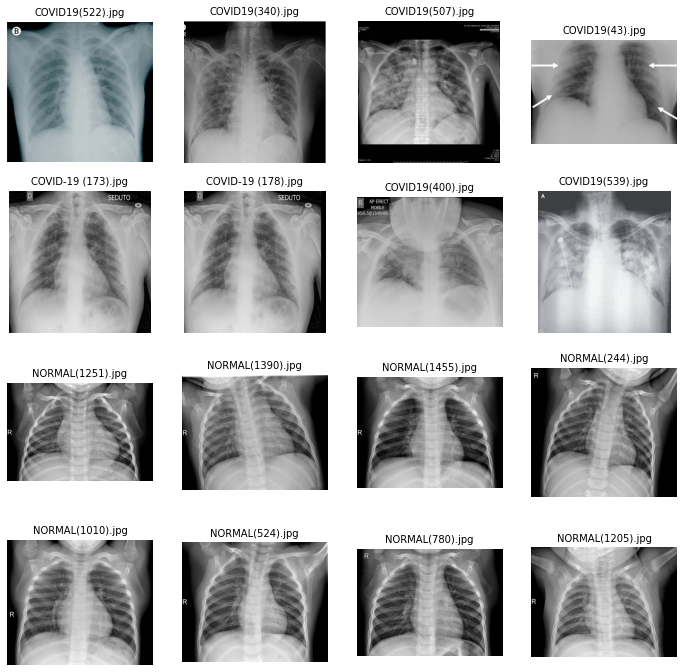

In [ ]:
import matplotlib.image as mpimg
nrows=ncols=4
fig= plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic = [os.path.join(train_covid_dir, fname) for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir, fname) for fname in train_normal_names[0:8]]



for i, img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/')[-1]
  print(data)
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 validation_split=.2,
                                 zoom_range = .2,
                                 horizontal_flip=True)
validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator  = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                     subset='training',
                                                     batch_size=32,
                                                     class_mode='binary')
validation_generator  = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                     subset='validation',
                                                     batch_size=32,
                                                     class_mode='binary')
test_generator  = test_datagen.flow_from_directory(test_dir,
                                                     target_size=(150,150),                                                    
                                                     batch_size=32,
                                                     class_mode='binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='SAME',input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator,epochs=30,validation_data=validation_generator,validation_steps=10)

Epoch 1/30
46/46 [==============================] - 48s 1s/step - loss: 0.4570 - accuracy: 0.7695 - val_loss: 0.3062 - val_accuracy: 0.9375
Epoch 2/30
46/46 [==============================] - 47s 1s/step - loss: 0.2239 - accuracy: 0.9193 - val_loss: 0.2011 - val_accuracy: 0.9594
Epoch 3/30
46/46 [==============================] - 47s 1s/step - loss: 0.1764 - accuracy: 0.9427 - val_loss: 0.1960 - val_accuracy: 0.9281
Epoch 4/30
46/46 [==============================] - 47s 1s/step - loss: 0.1851 - accuracy: 0.9310 - val_loss: 0.1799 - val_accuracy: 0.9406
Epoch 5/30
46/46 [==============================] - 47s 1s/step - loss: 0.1419 - accuracy: 0.9531 - val_loss: 0.1448 - val_accuracy: 0.9375
Epoch 6/30
46/46 [==============================] - 47s 1s/step - loss: 0.1153 - accuracy: 0.9524 - val_loss: 0.1336 - val_accuracy: 0.9594
Epoch 7/30
46/46 [==============================] - 47s 1s/step - loss: 0.1452 - accuracy: 0.9558 - val_loss: 0.2328 - val_accuracy: 0.9375
Epoch 8/30
46/46 [==

Text(0.5, 1.0, 'Training and Validation loss')

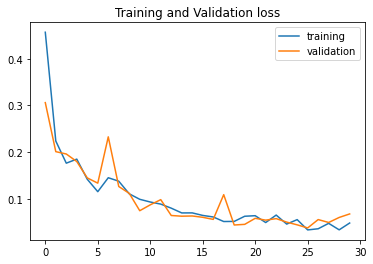

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation loss')
# plt.xlable('epochs')


Text(0.5, 1.0, 'Training and Validation accuracy')

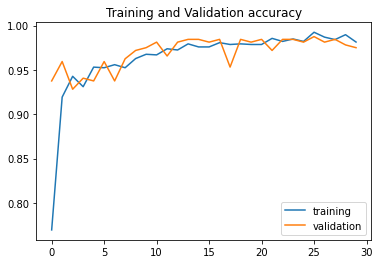

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy')
# plt.xlable('epochs')

In [ ]:
test_loss, test_accu = model.evaluate(test_generator)
print(f'test accuracy: {test_accu}, test loss is {test_loss}')

16/16 [==============================] - 10s 650ms/step - loss: 0.0779 - accuracy: 0.9690
test accuracy: 0.9690082669258118, test loss is 0.07792337238788605


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  print(path)
  img = image.load_img(path, target_size=(150,150))
  x= image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print("Covid19")
  else:
    print("Normal")

Saving NORMAL(10).jpg to NORMAL(10) (3).jpg
Saving COVID-19 (313).jpg to COVID-19 (313) (3).jpg
/content/NORMAL(10).jpg
NORMAL(10).jpg
Normal
/content/COVID-19 (313).jpg
COVID-19 (313).jpg
Covid19
